In [13]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

FIGSIZE = (20, 6)

In [14]:
from src.read_input import format_dataset, group_datasets_by_location


years = [i.name for i in os.scandir(f"inmet-data") if i.is_dir()]
location = "A001"


raw_data = group_datasets_by_location(location, years)
raw_data

,index,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,0,2000-05-07,00:00,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,NaN
1,1,2000-05-07,01:00,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,NaN
2,2,2000-05-07,02:00,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,NaN
3,3,2000-05-07,03:00,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,NaN
4,4,2000-05-07,04:00,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212443,5107,2024/07/31,1900 UTC,0,"890,4","890,4","890,2","1429,4","25,3","7,2",...,"25,1","7,7","6,4",32.0,27.0,32.0,92.0,"9,1","4,7",NaN
212444,5108,2024/07/31,2000 UTC,0,"890,8","890,9","890,4","915,5",25,"8,1",...,"24,8","8,3","6,8",34.0,29.0,34.0,109.0,"8,9","3,7",NaN
212445,5109,2024/07/31,2100 UTC,0,"891,2","891,2","890,8","318,2","23,3","8,6",...,"23,3","8,7","7,8",39.0,34.0,39.0,112.0,"8,3","2,8",NaN
212446,5110,2024/07/31,2200 UTC,0,"891,3","891,3","891,2",NaN,"22,3","8,8",...,"22,1","8,8","8,4",42.0,39.0,42.0,106.0,"6,1","2,7",NaN


In [15]:
renamed_data = format_dataset(raw_data)
renamed_data

,global-radiation,total-precipitation,relative-humidity,temperature-last-hour-max,temperature-last-hour-min,wind-speed,wind-speed-max-gust
datetime,,,,,,,
2000-05-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-07 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-07 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-07 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-07 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-07-31 19:00:00,1429.4,0.0,32.0,27.4,25.1,4.7,9.1
2024-07-31 20:00:00,915.5,0.0,34.0,26.4,24.8,3.7,8.9
2024-07-31 21:00:00,318.2,0.0,39.0,25.1,23.3,2.8,8.3


In [16]:
from src.grouping_data import (
    group_df_by_day,
    make_rolling_window,
    DEFAULT_INDEX_COLUMN,
    DEFAULT_TARGET_COLUMN,
)

target = DEFAULT_TARGET_COLUMN
idx = DEFAULT_INDEX_COLUMN

by_day = group_df_by_day(renamed_data, idx, target)
by_day

,global-radiation,total-precipitation,relative-humidity,temperature-last-hour-max,temperature-last-hour-min,wind-speed,wind-speed-max-gust
datetime,,,,,,,
2000-05-07,1880.000000,0.0,48.416667,25.933333,24.366667,1.766667,4.275000
2000-05-08,1783.833333,0.0,60.500000,22.654167,21.416667,2.066667,4.133333
2000-05-09,1446.666667,0.0,58.791667,22.804167,21.345833,1.150000,2.891667
2000-05-10,1638.416667,0.0,61.750000,23.087500,21.895833,2.008333,4.037500
2000-05-11,1675.333333,0.0,62.416667,21.850000,20.775000,2.670833,5.408333
...,...,...,...,...,...,...,...
2024-07-27,1349.150000,0.0,56.500000,20.295833,18.191667,1.775000,4.662500
2024-07-28,1630.133333,0.0,56.541667,21.704167,19.850000,1.925000,4.358333
2024-07-29,1552.900000,0.0,51.791667,21.862500,19.458333,1.750000,4.112500


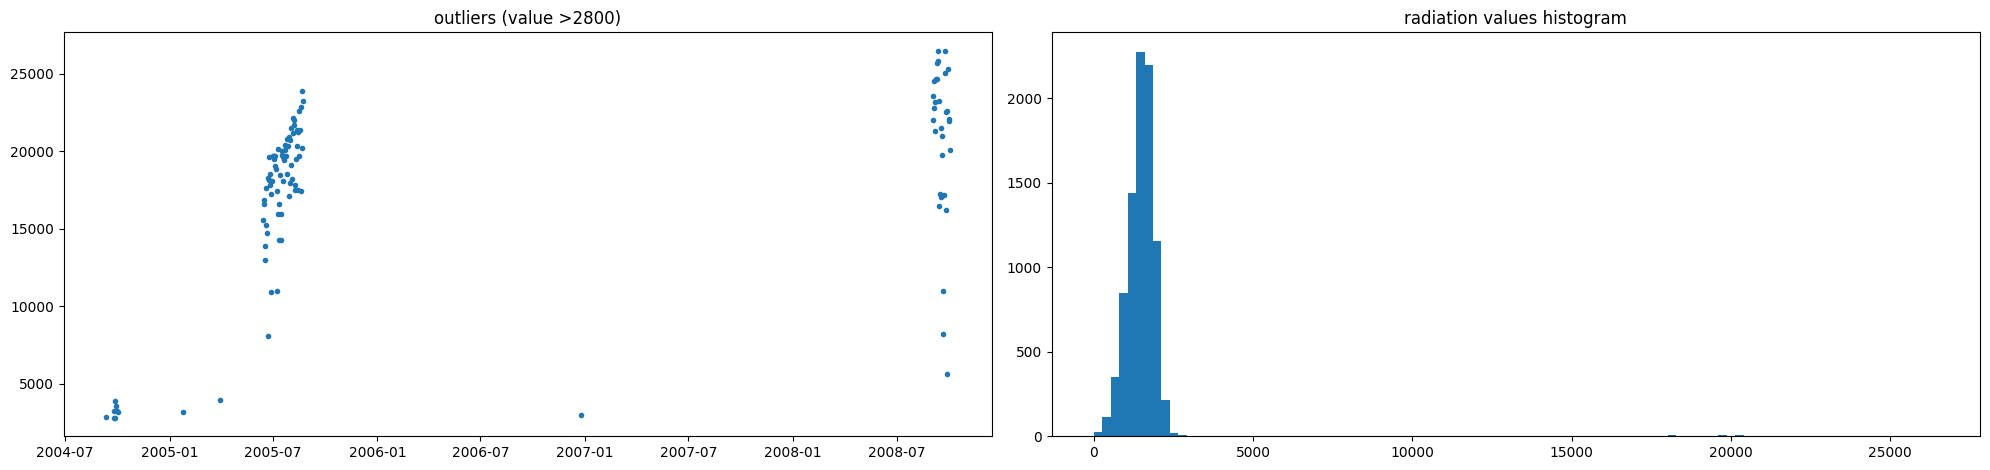

In [17]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(20)
cap = 2800

ax[0].set_title(f"outliers (value >{cap})")
ax[0].plot(by_day.loc[by_day[target] > cap, target], ".")

ax[1].set_title("radiation values histogram")
ax[1].hist(by_day[target], 100)

plt.tight_layout()

by_day = by_day.loc[by_day[target] < cap]

'len(train) = 8412 | len(test) = 365'

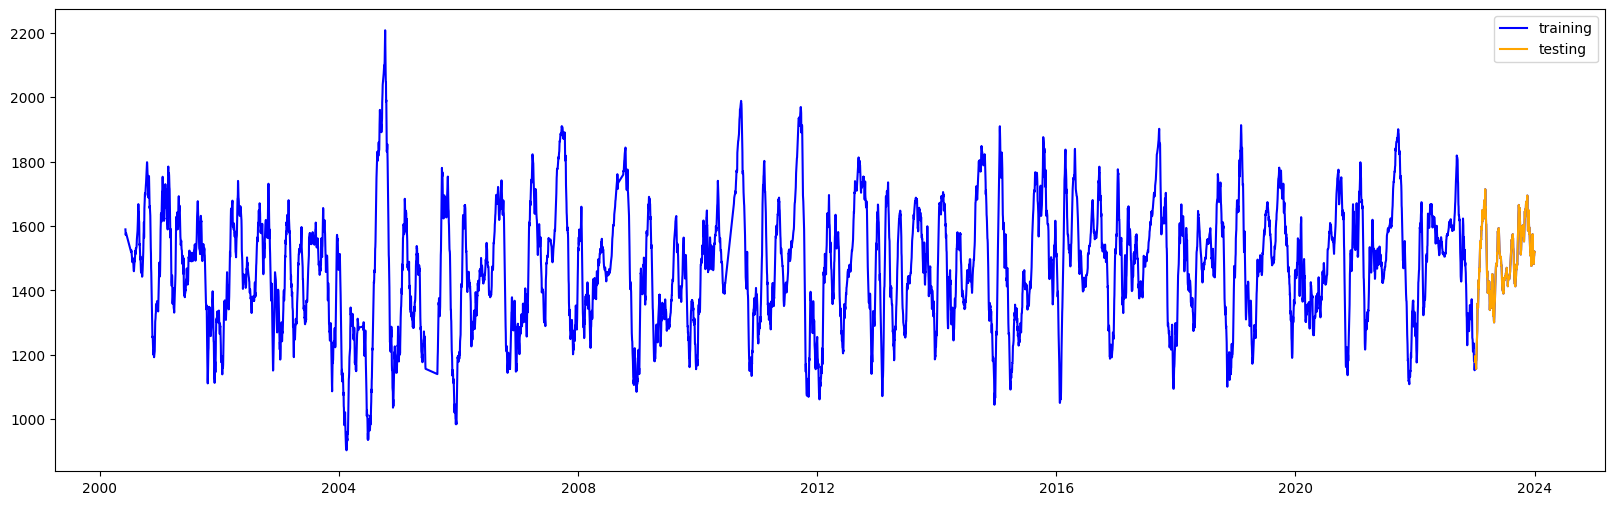

In [18]:
from src.train_test_data import training_threshold, testing_treshold

date_threshold = pd.to_datetime("2023-01-01", format="%Y-%m-%d")
date_upper_threshold = date_threshold + pd.DateOffset(years=1)


def training_threshold(col, date_threshold: pd.DatetimeIndex):
    return col <= date_threshold


def testing_treshold(
    col, date_lower_threshold: pd.DatetimeIndex, date_upper_threshold: pd.DatetimeIndex
):
    return ~training_threshold(col, date_lower_threshold) & (
        col <= date_upper_threshold
    )


def split_datasets(
    df: pd.DataFrame,
    date_lower_threshold: pd.DatetimeIndex,
    date_upper_threshold: pd.DatetimeIndex,
):
    return (
        df[training_threshold(df.index, date_upper_threshold)].dropna(),
        df[
            testing_treshold(df.index, date_lower_threshold, date_upper_threshold)
        ].dropna(),
    )


train, test = split_datasets(by_day, date_threshold, date_upper_threshold)

by_day_rolling = make_rolling_window(by_day)
train_rolling, test_rolling = split_datasets(
    by_day_rolling, date_threshold, date_upper_threshold
)

plt.figure(figsize=FIGSIZE)
plt.plot(train_rolling[target], color="blue", label="training")
plt.plot(test_rolling[target], color="orange", label="testing")
plt.legend()

f"len(train) = {train[target].size} | len(test) = {test[target].size}"

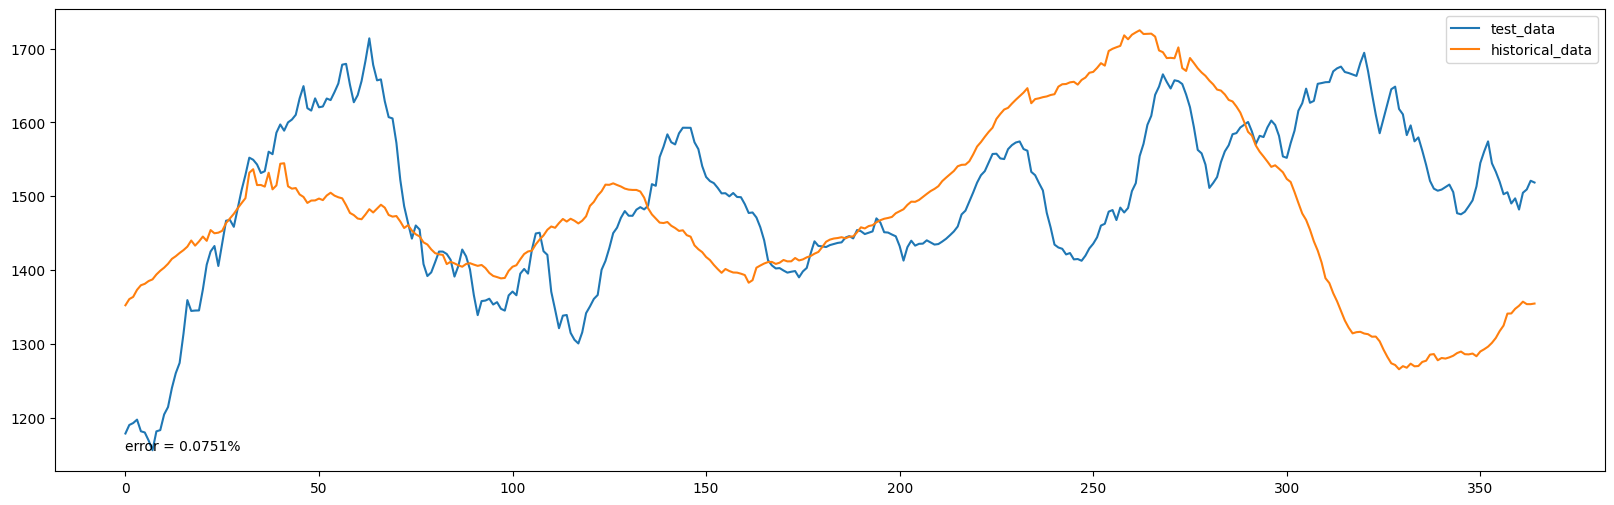

'error = 0.0751%'

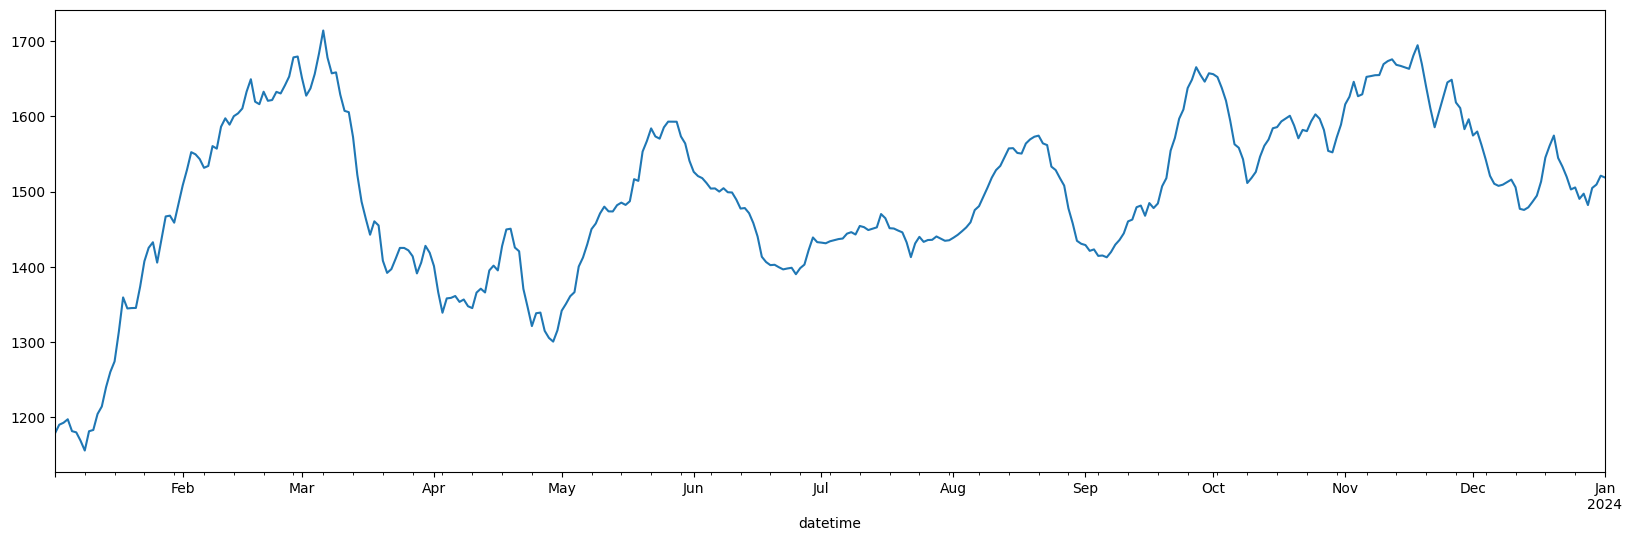

In [19]:
from src.historical_mean import group_data_by_day_of_year

historical_mean = group_data_by_day_of_year(train_rolling, idx)

test_rolling = test_rolling.copy()
test_rolling["doy"] = test_rolling.index.day_of_year

target_columns = [f"{target}_x", f"{target}_y"]
merged = (
    test_rolling.merge(historical_mean, on="doy")
    .loc[:, target_columns]
    .rename(columns=dict(zip(target_columns, ["test_data", "historical_data"])))
)

from sklearn.metrics import mean_absolute_percentage_error as mape

error = mape(merged["test_data"], merged["historical_data"])

error_message = f"error = {error:.4f}%"
merged.plot(figsize=FIGSIZE).text(
    merged.index.min(), merged.test_data.min(), error_message
)
plt.show()
test_rolling[target].plot(figsize=FIGSIZE)
error_message

In [20]:
by_day_rolling.to_csv(f"treated-data/by_day_rolling_{location}.csv")

In [21]:
from src.forecasting.forecast_picker import ForecastPicker

fp = ForecastPicker(
    by_day_rolling, date_threshold, date_upper_threshold, target, idx, mape
)

fp._forecast_scores

[0]	validation_0-rmse:1338.15818	validation_1-rmse:1350.26597
[99]	validation_0-rmse:120.64307	validation_1-rmse:158.55246


12:12:02 - cmdstanpy - INFO - Chain [1] start processing
12:12:03 - cmdstanpy - INFO - Chain [1] done processing


{<src.forecasting.xgb.XGBForecaster at 0x7fbcc40c5330>: 0.08604888471079579,
 <src.forecasting.prophet.ProphetForecaster at 0x7fbcc40c52a0>: 0.08373991377599567}

0.08604888471079579


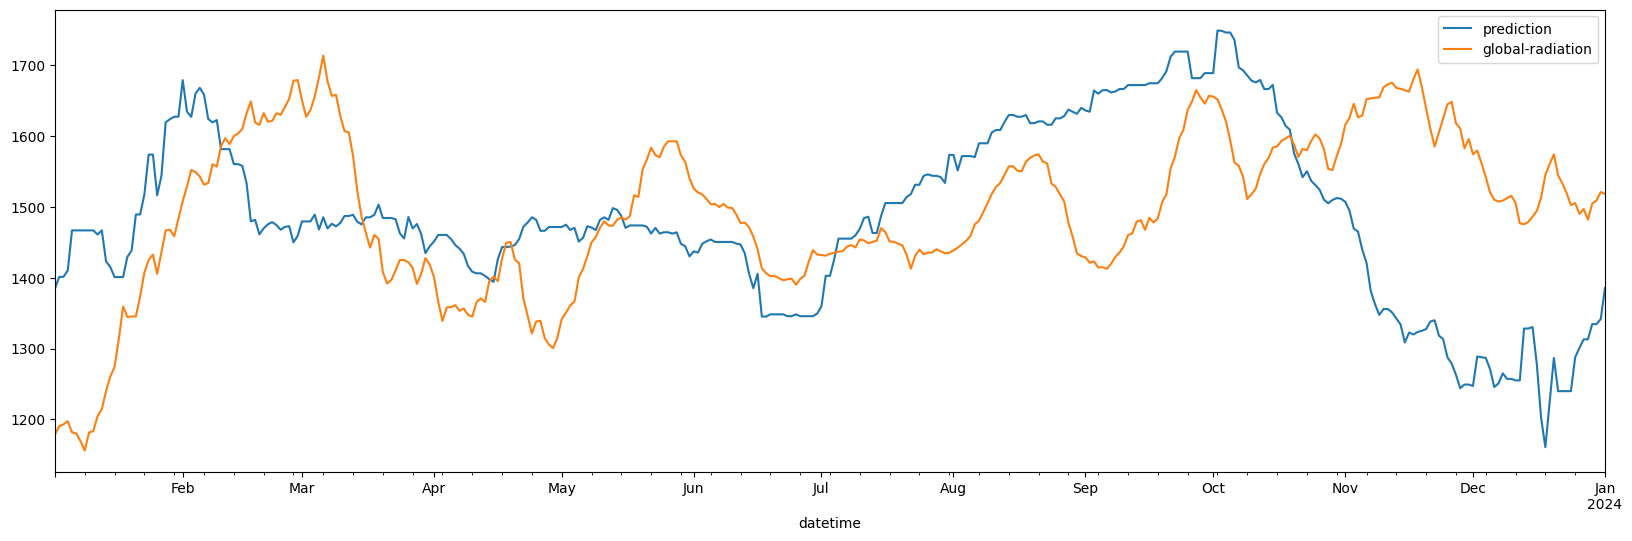

0.08373991377599567


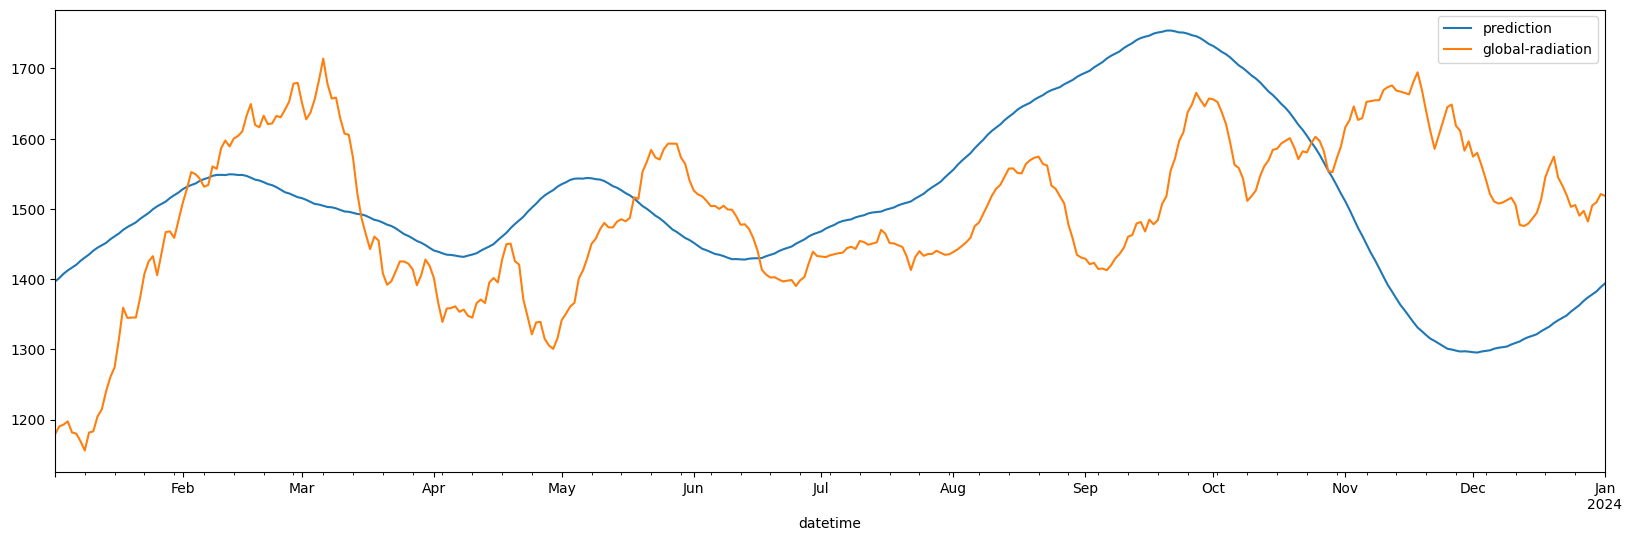

In [22]:
for p in fp._forecast_scores.keys():
    print(fp._forecast_scores[p])
    date = p.prediction.index.max()
    p.prediction.plot(figsize=FIGSIZE)
    plt.show()

In [23]:
pred = fp.make_prediction()

12:12:05 - cmdstanpy - INFO - Chain [1] start processing
12:12:05 - cmdstanpy - INFO - Chain [1] done processing


<Axes: xlabel='datetime'>

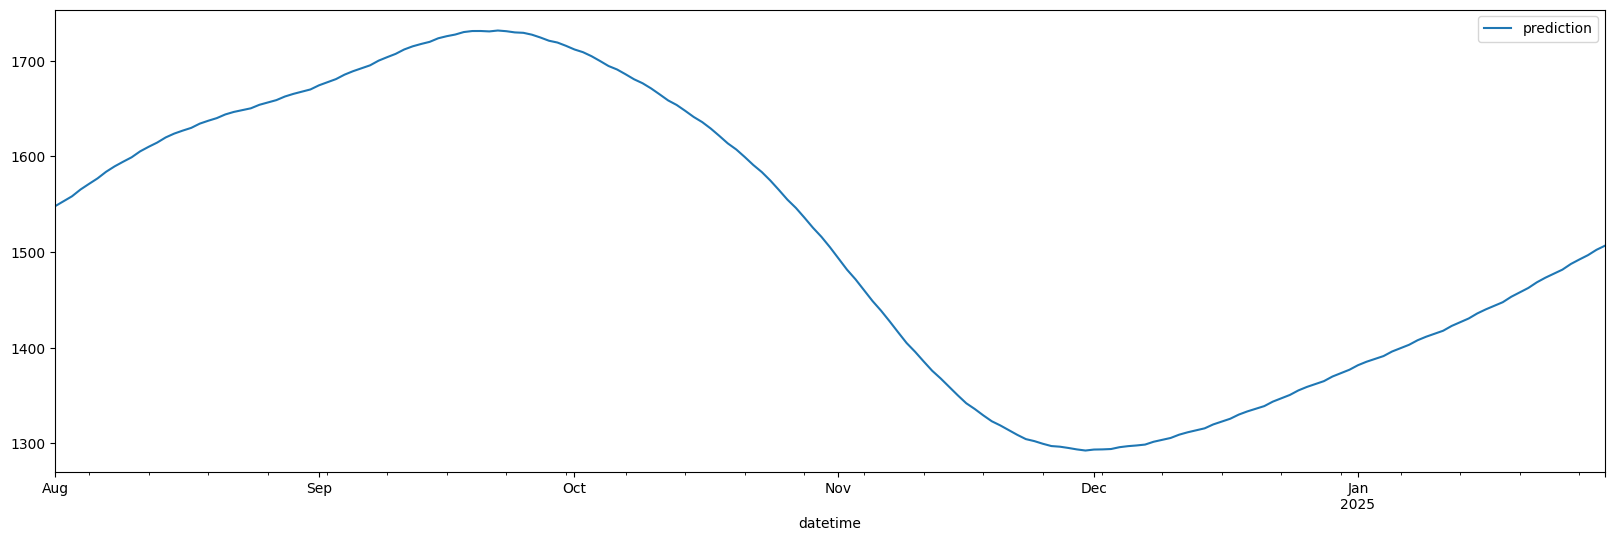

In [24]:
pred.plot(figsize=FIGSIZE)